<h1 align='center'>Build and Evaluate a Classification Model</h1>

In this notebook we will build classification models using the decision trees and logistic regression algorithms and choose the best one.


## The process of training a model

![Model Training Process](https://user.oc-static.com/upload/2019/10/01/15699222528661_proces1.png)

## Import the libraries


In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn functionality

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn import tree

# Define the task

> Make predictions about a country's life expectancy (L/M/H bands) from a set of metrics for the country.

# Acquire clean data

## About the dataset
The dataset used in this notebook is a selected and preprocessed subset from the original datasets provided by [World Bank](https://worldhappiness.report/), [Gapminder](https://www.gapminder.org/data/) and the [World Happiness Report](https://www.worldbank.org/).

When doing any machine learning task, it is important to understand as much about the meaning of the data as possible. Here are the descriptions of the columns from the respective sources:

* **Country:** Country name.

* **Happiness:** The national average response to the question: “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?”

* **Income:** Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP).

* **Lifeexp:** The average number of years a newborn child would live if current mortality patterns were to stay the same.

* **Sanitation:** The percentage of people using at least basic sanitation services, that is, improved sanitation facilities that are not shared with other households.

* **Water:** The percentage of people with at least basic water services.

* **Urbanpopulation:** Urban population refers to people living in urban areas as defined by national statistical offices.

* **Unemployment:** Percentage of total population that has been registered as long-term unemployed during the given year.

* **Literacy:** Adult literacy rate is the percentage of people ages 15 and above who can clearly read and write a short, simple statement on their everyday life.

* **Inequality:** Gini income inequality in a society. A higher number means more inequality.

* **Murder:** Mortality due to interpersonal violence, per 100,000 standard population, age adjusted. This rate is calculated as if all countries had the same age composition of the population.

* **Energy:** Energy use refers to use of primary energy before transformation to other end-use fuels, which is equal to indigenous production plus imports and stock changes, minus exports and fuels supplied to ships and aircraft engaged in international transport.

* **Childmortality:** Death of children under five years of age per 1,000 live births.

* **Fertility:** Total fertility rate. The number of children that would be born to each woman with prevailing age-specific fertility rates.

* **HIV:** The total number of persons of all ages estimated to be infected by HIV, including those without symptoms, those sick from AIDS, and those healthy due to treatment of the HIV infection.

* **Foodsupply:** Calories measures the energy content of the food. The required intake varies, but it is normally in the range of 1500-3000 kilocalories per day. One banana contains approximately 100 kilocalories.

* **Populationtotal:** Total population.

## Load the data
We will load our data.

In [2]:
# Load the data set
dataset = pd.read_csv("world_data.csv")

## Inspect the data

Identify the number of features (columns) and samples (rows)

In [3]:
# Examine the date shape
dataset.shape

(194, 17)

Take a quick look at the data to understand what you are dealing with.

In [4]:
# Inspect first few rows
dataset.head()

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,11.0,NaN,39.0,NaN,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,NaN,6.090,96.8,29.0,2.30,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,43.1,0.856,97.9,41.4,4.65,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,36.7,7.110,99.6,32.4,1.12,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,60.2,1.240,NaN,34.7,1.11,5480.0,3.8,1.86,22000.0,3280.0,23800000


In [5]:
dataset[dataset['energy'] == dataset['energy'].max()]

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
101,Qatar,6.374529,120000.0,80.5,100.0,100.0,NaN,0.0676,96.3,NaN,1.09,18600.0,8.6,1.93,NaN,NaN,2480000


In [6]:
dataset[dataset['happiness'] == dataset['happiness'].max()]

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
92,Norway,7.603434,63700.0,82.1,98.1,100.0,18.7,0.812,NaN,27.5,0.389,5820.0,2.7,1.84,4500.0,3490.0,5200000


In [7]:
dataset['hiv'].mean()

217991.677852349

In [8]:
dataset[dataset['hiv']>= 217991.677852]

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
15,Botswana,3.761965,15400.0,64.6,60.00,79.2,NaN,NaN,85.1,60.5,NaN,1250.00,42.1,2.77,300000.0,2330.0,2210000
16,Brazil,6.546897,14700.0,75.2,86.10,97.5,40.90,NaN,90.4,51.3,15.70,1480.00,15.7,1.74,490000.0,3260.0,206000000
20,Cameroon,5.037965,2990.0,59.7,38.80,65.3,26.60,1.2200,71.3,46.6,NaN,342.00,83.3,4.78,550000.0,2670.0,22800000
24,China,5.303878,13600.0,76.3,75.00,95.8,26.10,NaN,95.1,42.2,NaN,2240.00,10.7,1.62,780000.0,3110.0,1400000000
38,Ethiopia,4.573155,1530.0,65.2,7.08,39.1,3.88,0.5890,39.0,39.1,NaN,497.00,61.3,4.32,790000.0,2130.0,99900000
44,Ghana,3.985916,3930.0,65.4,14.30,77.8,17.80,1.4900,71.5,42.4,NaN,335.00,61.0,4.04,230000.0,3020.0,27600000
52,India,4.342079,5750.0,68.2,44.20,87.6,14.70,NaN,62.8,35.1,NaN,637.00,45.2,2.35,2400000.0,2460.0,1310000000
53,Indonesia,5.042800,10400.0,71.4,67.90,89.5,13.10,1.2600,92.8,39.5,NaN,884.00,27.3,2.39,380000.0,2780.0,258000000
59,Cote d'Ivoire,4.445039,3250.0,59.2,29.90,73.1,19.60,NaN,56.9,41.5,NaN,616.00,95.1,4.97,360000.0,2800.0,23100000
63,Kenya,4.357618,2840.0,66.3,29.80,58.5,10.60,NaN,72.2,40.8,NaN,513.00,51.0,3.92,1600000.0,2210.0,47200000


In [9]:
dataset[dataset.duplicated(subset= 'hiv')]

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
7,Bahrain,6.007375,44500.0,76.8,100.0,100.0,NaN,NaN,94.6,NaN,0.521,10600.0,7.7,2.05,NaN,NaN,1370000
10,Belgium,6.904219,41700.0,80.9,99.5,100.0,26.8,2.460,NaN,27.7,0.978,4690.0,4.0,1.79,20000.0,3730.0,11300000
14,Bosnia and Herzegovina,5.117178,10900.0,77.4,94.8,97.7,NaN,7.900,98.0,32.7,1.010,2190.0,6.1,1.35,NaN,3150.0,3540000
19,Cambodia,4.162165,3290.0,68.3,48.8,75.0,11.5,0.130,73.9,NaN,NaN,417.0,32.0,2.59,64000.0,2480.0,15500000
27,"Congo, Dem. Rep.",3.902742,750.0,60.9,19.7,41.8,23.4,NaN,61.2,42.1,NaN,390.0,97.6,6.17,NaN,NaN,76200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Tonga,NaN,5190.0,70.3,93.5,99.9,NaN,NaN,99.0,37.5,NaN,567.0,16.8,3.68,NaN,NaN,106000
190,Trinidad and Tobago,NaN,31300.0,73.1,92.1,96.9,NaN,NaN,98.8,40.3,12.100,14400.0,19.1,1.77,13000.0,3050.0,1360000
191,Tuvalu,NaN,3320.0,NaN,91.4,99.3,NaN,NaN,NaN,39.1,NaN,NaN,26.2,NaN,NaN,NaN,11000
192,Vanuatu,NaN,2810.0,63.6,53.5,90.5,NaN,0.978,83.2,37.6,NaN,159.0,28.2,3.31,NaN,2840.0,265000


In [10]:
dataset[dataset['country'] == 'Palestine']

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
94,Palestine,4.695239,2650.0,71.8,96.0,87.6,NaN,3.25,95.3,34.4,NaN,NaN,20.0,4.08,NaN,NaN,4660000


In [11]:
dataset[dataset['country'] == 'Tunisia']

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
125,Tunisia,5.131612,10800.0,77.4,93.1,94.2,19.4,4.19,79.1,35.8,0.0745,944.0,14.0,2.22,1700.0,3350.0,11300000


In [12]:
dataset[dataset['country'] == 'Algeria']

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
140,Algeria,NaN,13700.0,77.3,87.5,93.5,6.5,2.15,72.7,27.6,NaN,1320.0,25.5,2.84,NaN,3300.0,39900000


In [13]:
dataset[dataset['country'] == 'Cuba']

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
152,Cuba,NaN,20000.0,78.9,90.8,95.2,18.5,0.401,99.8,NaN,6.09,1020.0,5.6,1.72,14000.0,3410.0,11500000


Check we have sensible data types for each feature.  E.g. we don't want any numeric features to be showing as object type.

In [14]:
# Check data types
dataset.dtypes

country             object
happiness          float64
income             float64
lifeexp            float64
sanitation         float64
water              float64
urbanpopulation    float64
unemployment       float64
literacy           float64
inequality         float64
murder             float64
energy             float64
childmortality     float64
fertility          float64
hiv                float64
foodsupply         float64
population           int64
dtype: object

Check if there are nulls

In [15]:
# Check for nulls
dataset.isnull().mean().sort_values()

country            0.000000
water              0.000000
sanitation         0.000000
population         0.000000
income             0.005155
childmortality     0.005155
lifeexp            0.036082
fertility          0.051546
energy             0.128866
foodsupply         0.134021
inequality         0.175258
hiv                0.231959
literacy           0.231959
happiness          0.278351
urbanpopulation    0.386598
unemployment       0.422680
murder             0.520619
dtype: float64

## Clean data
Some of these features (murder, urbanpopulation, unemployment) are very sparsely populated.  If we were to impute the nulls, we would be estimating a large number of values. Let's discard them for now, but we may come back to these again later (remember, this is an iterative process).

In [16]:
# Discard very sparse features
dataset = dataset.drop(["murder","urbanpopulation","unemployment"], axis=1)

For the others, let's just impute with the mean value of the feature.  Again, we may want to come back to this later.

In [17]:
# Compute the mean for each feature
means = dataset.mean().to_dict()

# Impute each null with the mean of that feature
for m in means:
    dataset[m] = dataset[m].fillna(value=means[m])

C:\Users\hayth\AppData\Local\Temp\ipykernel_10384\569043488.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = dataset.mean().to_dict()


Confirm we have no nulls now:

In [18]:
# Check for nulls
dataset.isnull().mean()

country           0.0
happiness         0.0
income            0.0
lifeexp           0.0
sanitation        0.0
water             0.0
literacy          0.0
inequality        0.0
energy            0.0
childmortality    0.0
fertility         0.0
hiv               0.0
foodsupply        0.0
population        0.0
dtype: float64

## Understand the data

### Compute descriptive stats
Descriptive stats give an idea of the range and spread of values for each feature and allows us to spot and unexpected patterns.

In [19]:
# Compute descriptive stats
dataset.describe()

,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02,194.000000,1.940000e+02
mean,5.395765,17432.849741,71.933690,73.838247,86.329381,81.573826,38.579375,2183.725325,31.441451,2.835924,2.179917e+05,2845.952381,3.787195e+07
std,0.953547,19072.580021,7.466359,29.269367,17.568245,17.055722,7.257464,2618.536430,31.237992,1.336162,5.521169e+05,413.199619,1.419670e+08
min,2.701591,623.000000,49.600000,7.080000,19.300000,25.300000,16.600000,9.580000,2.200000,1.240000,6.000000e+01,1880.000000,1.100000e+04
25%,4.891838,3297.500000,66.425000,49.225000,77.900000,75.575000,34.000000,614.500000,8.200000,1.790000,1.025000e+04,2570.000000,1.982500e+06
50%,5.395765,11050.000000,72.550000,87.900000,94.950000,81.573826,38.579375,1565.000000,17.900000,2.415000,7.000000e+04,2845.952381,8.435000e+06
75%,5.880369,24100.000000,77.400000,97.700000,99.300000,95.375000,42.175000,2425.000000,49.225000,3.687500,2.179917e+05,3140.000000,2.742500e+07
max,7.603434,120000.000000,83.800000,100.000000,100.000000,100.000000,63.000000,18600.000000,137.000000,7.290000,5.600000e+06,3770.000000,1.400000e+09


### Visualise
A correlation matrix can be used to spot correlations between the features.

We hope to see some good correlations of lifeexp with other features, as that's the one we want to predict.

C:\Users\hayth\AppData\Local\Temp\ipykernel_10384\3032035654.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), vmin = -1, vmax = 1, cmap = 'RdYlBu', annot= True)


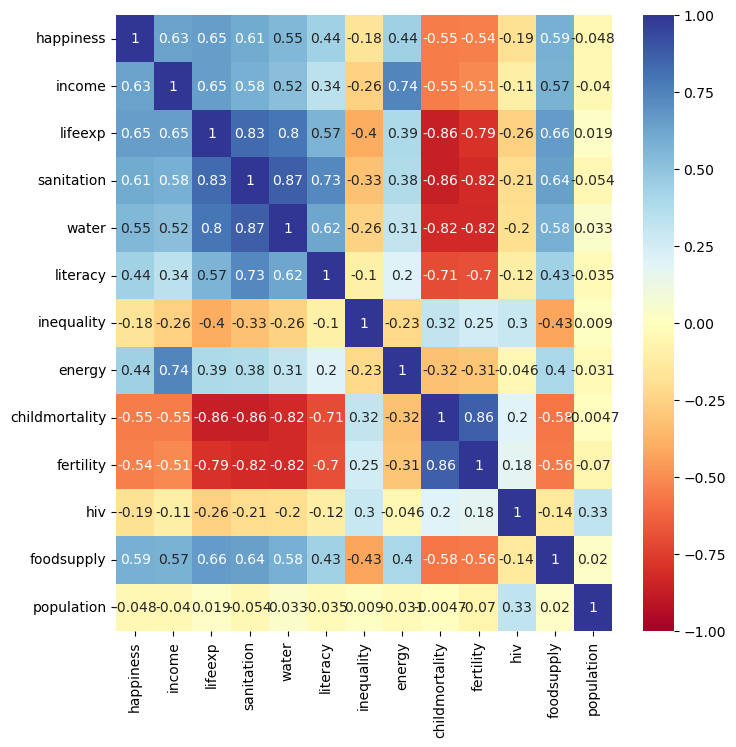

In [20]:
# Display a correlation matrix
plt.figure(figsize = (8, 8))
sns.heatmap(dataset.corr(), vmin = -1, vmax = 1, cmap = 'RdYlBu', annot= True)
plt.show()

> Look at the lifeexp column. You can see that sanitation, water, foodsupply, and happiness are in dark blue, indicating strong positive correlations with lifeexp. Childmortality and fertility are in dark red, indicating strong negative correlations with lifeexp. Do these observations fit with your understanding of factors that may influence life expectancy? If they do, that's good news as you can expect the model to pick this up and model your real-world understanding! This demonstrates the use of domain knowledge to the task in hand!

We can also plot some boxplots to understand the distribution of each feature.  

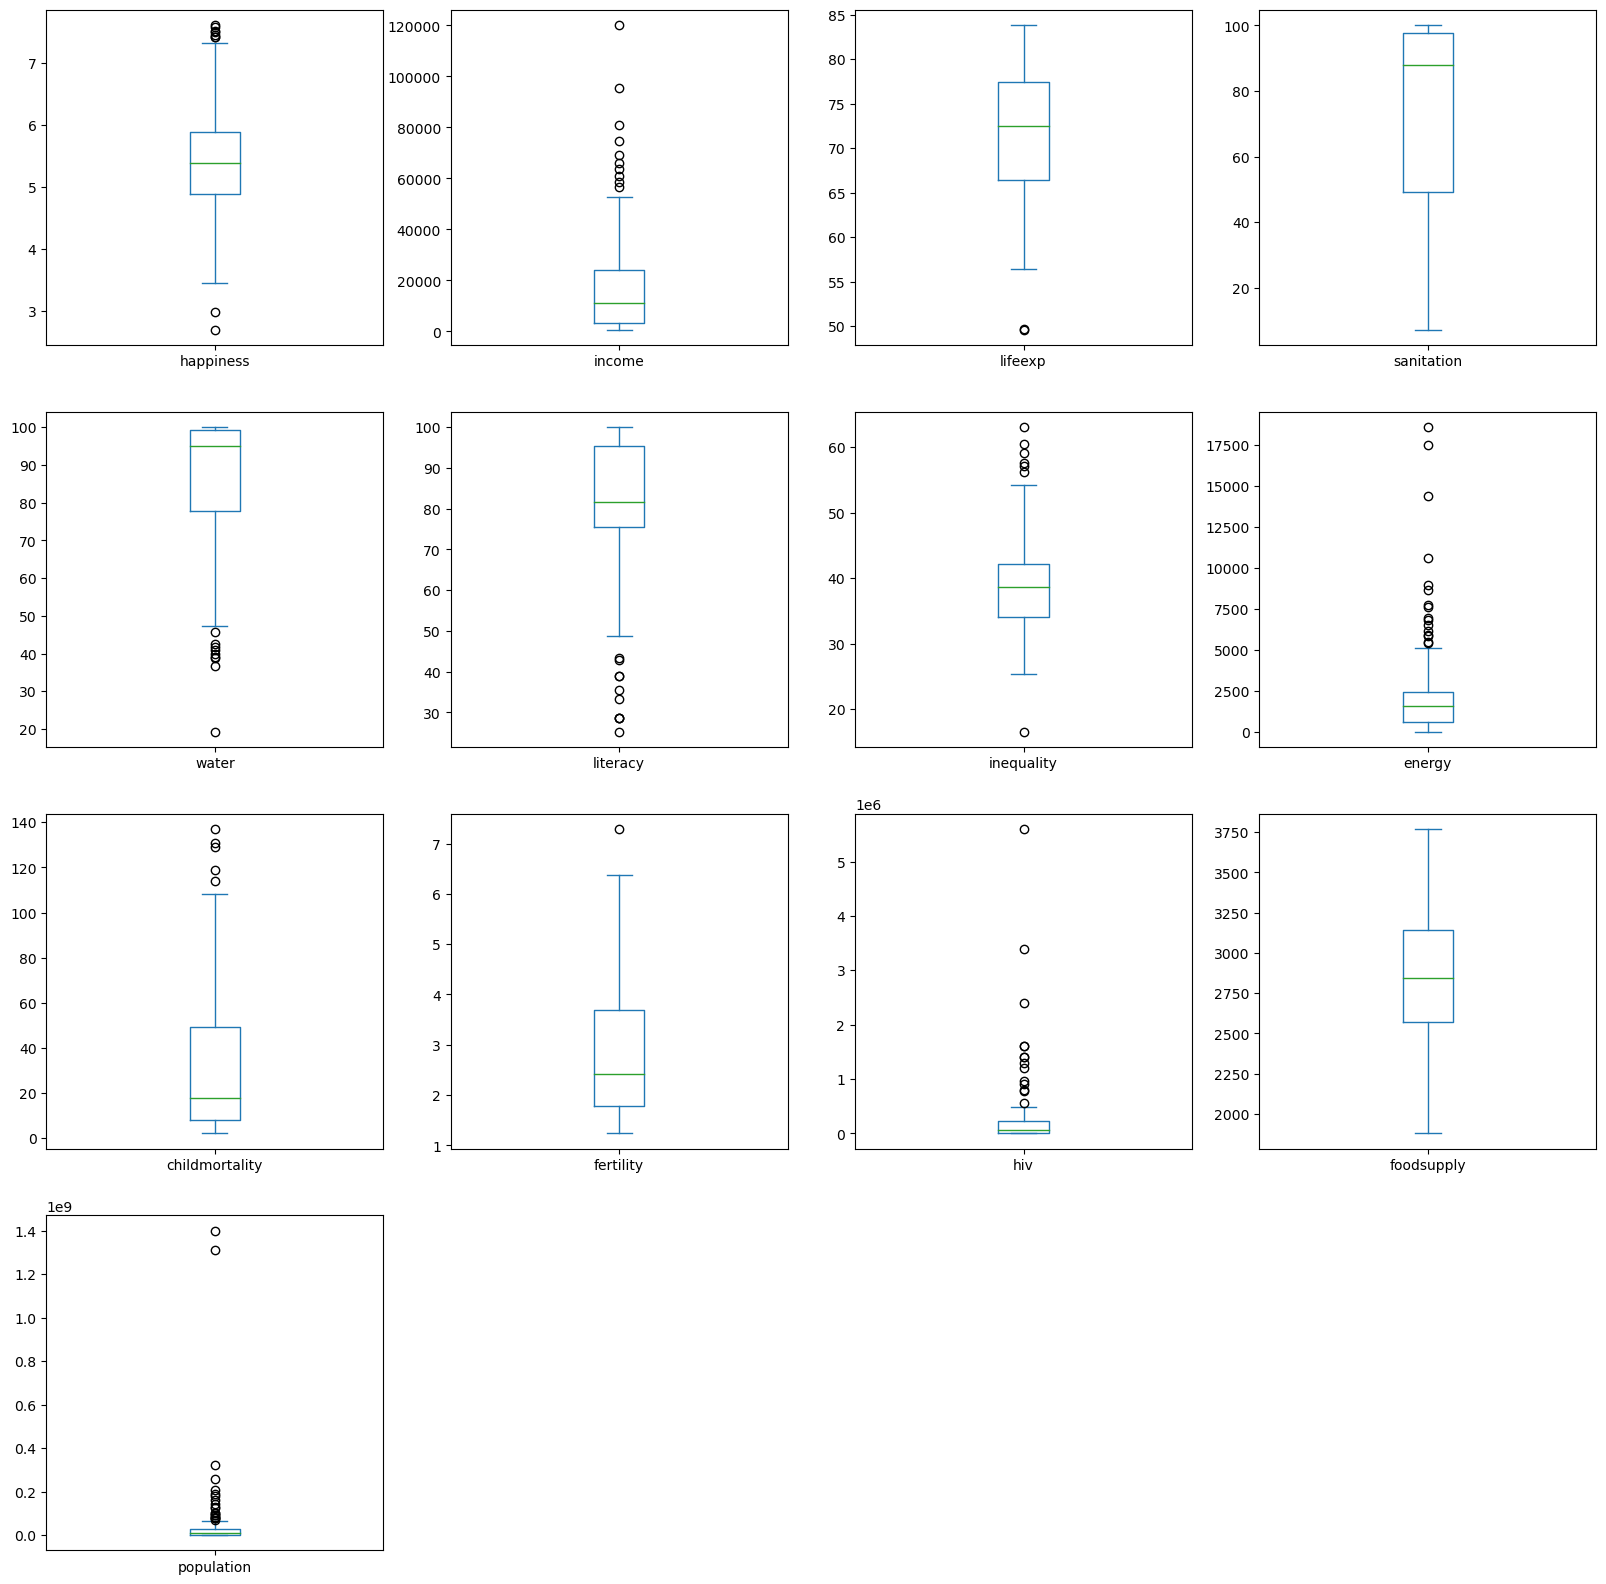

In [21]:
# Display boxplots for each numeric feature
dataset.plot(kind = 'box', subplots = True, figsize = (20, 20), layout=(4, 4))
plt.show()

## Prepare Data
### Feature Engineering

The task was defined as:

> Make predictions about a country's life expectancy (L/M/H bands) from a set of metrics for the country.

However, lifeexp is currently a continuous numeric feature. The data should be binned into L, M, and H bands.
We need to create our banded lifeexp feature, which will be the target feature:

In [22]:
# Bin lifexp into L, M and H bands

# compute the bin boundaries
percentiles = np.linspace(0, 100, 4)
bins = np.percentile(dataset["lifeexp"], percentiles)

# split the data into bins
dataset["lifeexp_band"] = pd.cut(dataset["lifeexp"], bins = bins, labels = ["L","M","H"], include_lowest = True)

In [23]:
bins

array([49.6       , 69.93333333, 76.43333333, 83.8       ])

Check we have an even distribution of rows across the bands:

In [24]:
# Check how many rows in each bin
dataset.lifeexp_band.value_counts()

L    65
H    65
M    64
Name: lifeexp_band, dtype: int64

And let's check a few rows to confirm it has done as expected:

In [25]:
# Check the binning has worked as expected
dataset[['lifeexp','lifeexp_band']]

,lifeexp,lifeexp_band
0,57.90000,L
1,77.60000,H
2,76.50000,H
3,75.40000,M
4,82.60000,H
...,...,...
189,70.30000,M
190,73.10000,M
191,71.93369,M
192,63.60000,L



### Select features and split into input and target features
Now we need to decide which columns to use as inputs and which is our target.  Let's remind ourselves of the columns we have:

In [26]:
dataset.columns

Index(['country', 'happiness', 'income', 'lifeexp', 'sanitation', 'water',
       'literacy', 'inequality', 'energy', 'childmortality', 'fertility',
       'hiv', 'foodsupply', 'population', 'lifeexp_band'],
      dtype='object')

And let's select **lifeexp_band** as our target feature (the one we will predict) and everything else as the input features (the ones we will use to make the prediction).

In [27]:
# Split into input and target features
y = dataset["lifeexp_band"]
X = dataset[['happiness', 'income', 'sanitation', 'water', 'childmortality', 'fertility',  'hiv', 'foodsupply', 'population']]

In [28]:
X.head()

,happiness,income,sanitation,water,childmortality,fertility,hiv,foodsupply,population
0,3.982855,1750.0,39.2,63.0,73.2,4.80,5800.000000,2090.0,33700000
1,4.606651,11000.0,97.7,91.4,14.0,1.71,217991.677852,3190.0,2920000
2,6.697131,19100.0,94.8,99.6,11.6,2.31,95000.000000,3230.0,43400000
3,4.348320,8180.0,91.6,98.9,14.0,1.66,3600.000000,2930.0,2920000
4,7.309061,43800.0,100.0,100.0,3.8,1.86,22000.000000,3280.0,23800000


In [29]:
y.head()

0    L
1    H
2    H
3    M
4    H
Name: lifeexp_band, dtype: category
Categories (3, object): ['L' < 'M' < 'H']

###  Scale features
When we ran `dataset.describe()` above we saw that the range of values between the min and max was different for different features.  

In [30]:
X.describe()

,happiness,income,sanitation,water,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02,194.000000,1.940000e+02
mean,5.395765,17432.849741,73.838247,86.329381,31.441451,2.835924,2.179917e+05,2845.952381,3.787195e+07
std,0.953547,19072.580021,29.269367,17.568245,31.237992,1.336162,5.521169e+05,413.199619,1.419670e+08
min,2.701591,623.000000,7.080000,19.300000,2.200000,1.240000,6.000000e+01,1880.000000,1.100000e+04
25%,4.891838,3297.500000,49.225000,77.900000,8.200000,1.790000,1.025000e+04,2570.000000,1.982500e+06
50%,5.395765,11050.000000,87.900000,94.950000,17.900000,2.415000,7.000000e+04,2845.952381,8.435000e+06
75%,5.880369,24100.000000,97.700000,99.300000,49.225000,3.687500,2.179917e+05,3140.000000,2.742500e+07
max,7.603434,120000.000000,100.000000,100.000000,137.000000,7.290000,5.600000e+06,3770.000000,1.400000e+09


Many algorithms will not perform at their best when presented with such data, so we will scale the data to all be in the range 0 to 1:

In [31]:
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaledX, columns=X.columns)

We can now see every feature now has a min of 0 and a max of 1:

In [32]:
X.head()

,happiness,income,sanitation,water,childmortality,fertility,hiv,foodsupply,population
0,0.261384,0.009441,0.345674,0.541512,0.526706,0.588430,0.001025,0.111111,0.024064
1,0.388642,0.086926,0.975248,0.893432,0.087537,0.077686,0.038917,0.693122,0.002078
2,0.815110,0.154779,0.944038,0.995043,0.069733,0.176860,0.016954,0.714286,0.030992
3,0.335941,0.063304,0.909600,0.986369,0.087537,0.069421,0.000632,0.555556,0.002078
4,0.939946,0.361686,1.000000,1.000000,0.011869,0.102479,0.003918,0.740741,0.016992


In [33]:
X.describe()

,happiness,income,sanitation,water,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.549625,0.140813,0.718449,0.830600,0.216925,0.263789,0.038917,0.511086,0.027044
std,0.194528,0.159768,0.314995,0.217698,0.231736,0.220853,0.098593,0.218624,0.101406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.446821,0.022404,0.453562,0.726146,0.044510,0.090909,0.001820,0.365079,0.001408
50%,0.549625,0.087345,0.869780,0.937423,0.116469,0.194215,0.012489,0.511086,0.006017
75%,0.648486,0.196663,0.975248,0.991326,0.348850,0.404545,0.038917,0.666667,0.019582
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Build Models
Build both decision trees and logistic regression models and see which one performs the best.


### Split into test and training sets
We want both models to have a fair opportunity to triumph! So we need to present both with identical training and test sets. We will generate them once, using a specific seed, so we can get the same random sample each time we run this code.

In [34]:
# Split into test and training sets
test_size = 0.33
seed = 1
X_train, X_test, Y_train, Y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

### Create multiple models and fit them
Let's build both models and fit with the training data.

In [35]:
# Build a decision tree model
model_dt = DecisionTreeClassifier(max_depth= 3)
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
# Build a logistic regression model
model_lr = LogisticRegression(solver='lbfgs', multi_class='auto') #for multi-class target
model_lr.fit(X_train, Y_train)

LogisticRegression()

### Check the models
At this stage, we can check how well the models performed on the training data itself, and compute the accuracy score for each model. The accuracy score is:

$$
AccuracyScore = \frac{NumberOfCorrectPredictions}{TotalNumberOfPredictions}
$$

Let's compute the accuracy score for each of model based on the training data:

In [37]:
# Check the model performance with the training data
predictions_dt = model_dt.predict(X_train)
print("DecisionTreeClassifier", accuracy_score(Y_train, predictions_dt))

DecisionTreeClassifier 0.8682170542635659


In [38]:
# Check the model performance with the training data
predictions_lr = model_lr.predict(X_train)
print("LogisticRegression", accuracy_score(Y_train, predictions_lr))

LogisticRegression 0.8217054263565892


Based on the **training data**, the decision tree has done a great job, getting 100% of the classifications right! However, we can't rely on testing with our training data (remember, we are data scientists). So, we need to evaluate the model using the **test data**.

## Evaluate the models
Now we evaluate the models by testing with the test set:

In [39]:
predictions_dt = model_dt.predict(X_test)
print("DecisionTreeClassifier", accuracy_score(Y_test, predictions_dt))

DecisionTreeClassifier 0.6923076923076923


In [40]:
predictions_lr = model_lr.predict(X_test)
print("LogisticRegression", accuracy_score(Y_test, predictions_lr))

LogisticRegression 0.7384615384615385


0.7384615384615385

The tables have turned! Logistic regression shows a better accuracy score on the test data, despite the fact that the decision tree performed better on the test data.

<div class="alert alert-danger">

**Warning:** Decision trees tend to suffer from this problem - doing well on training data, but performing poorly on test data

</div>

### Choose the best performing model
Logistic Regression model will be our chosen model as it performed the best.

In [41]:
model = model_lr

<div class="alert alert-info">

The accuracy score is just one metric for evaluating classification models. However, it can be quite a crude measure.
</div>

## Iterate!
At this point, you should review your code and process and see what improvements could be made.

At this stage, you want to improve the accuracy of the created model. You may want to go back and do some more feature engineering:

<img src=https://user.oc-static.com/upload/2019/10/01/15699225328706_proces2.png width=800>

Or revisit cleanup:

<img src=https://user.oc-static.com/upload/2019/10/01/1569922551848_proces3.png width=800>

Or try some different algorithms or tune the algorithms:
<img src=https://user.oc-static.com/upload/2019/10/01/15699225657251_proces4.png width=800>

## Inspect the models

For a better understanding, you can look inside the models. Decision trees and logistic regression use very different ways of building models, so when you look under the hood, you see quite different things!

Here is the decision tree created for this exercise:

In [42]:
import graphviz

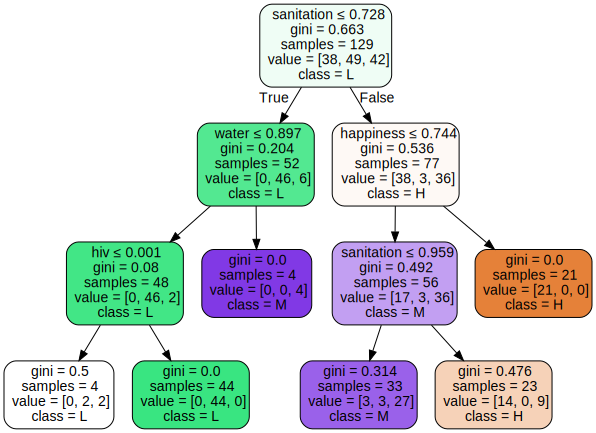

In [43]:
dot_data = tree.export_graphviz(model_dt,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=model.classes_,
                                filled=True,
                                rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data, format = 'png')
graph.render("Decision_tree_graph")
graph

We can also display the feature importance.

In [44]:
def decisionTreeSummary(model, column_names):
    '''Show a summary of the trained decision tree model'''

    # Plot the feature importances as bars
    fig = plt.figure(figsize=(8,len(column_names)/3))
    fig.suptitle('Decision tree feature importance', fontsize=16)
    rects = plt.barh(column_names, model.feature_importances_, color="khaki")

    # Annotate the bars with the feature importance values
    for rect in rects:
        width = round(rect.get_width(),4)
        plt.gca().annotate('  {}  '.format(width),
                    xy=(width, rect.get_y()),
                    xytext=(0,2),
                    textcoords="offset points",
                    ha='left', va='bottom')

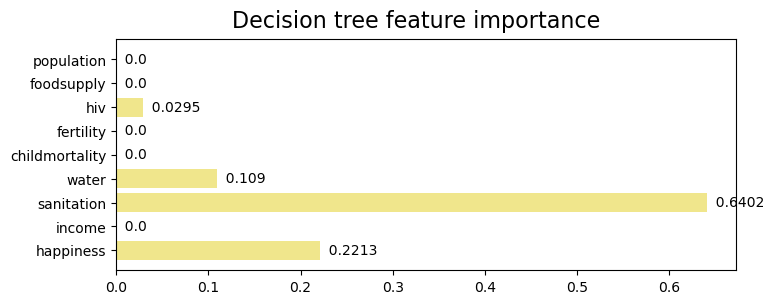

In [45]:
decisionTreeSummary(model_dt, X.columns)

For logistic regression we can examine the coefficients.  

And we can plot them:

In [46]:
def logisticRegressionSummary(model, column_names):
    '''Show a summary of the trained logistic regression model'''

    # Get a list of class names
    numclasses = len(model.classes_)
    if len(model.classes_)==2:
        classes =  [model.classes_[1]] # if we have 2 classes, sklearn only shows one set of coefficients
    else:
        classes = model.classes_

    # Create a plot for each class
    for i,c in enumerate(classes):
        # Plot the coefficients as bars
        fig = plt.figure(figsize=(8,len(column_names)/3))
        fig.suptitle('Logistic Regression Coefficients for Class ' + str(c), fontsize=16)
        rects = plt.barh(column_names, model.coef_[i],color="lightblue")

        # Annotate the bars with the coefficient values
        for rect in rects:
            width = round(rect.get_width(),4)
            plt.gca().annotate('  {}  '.format(width),
                        xy=(0, rect.get_y()),
                        xytext=(0,2),
                        textcoords="offset points",
                        ha='left' if width<0 else 'right', va='bottom')
        plt.show()

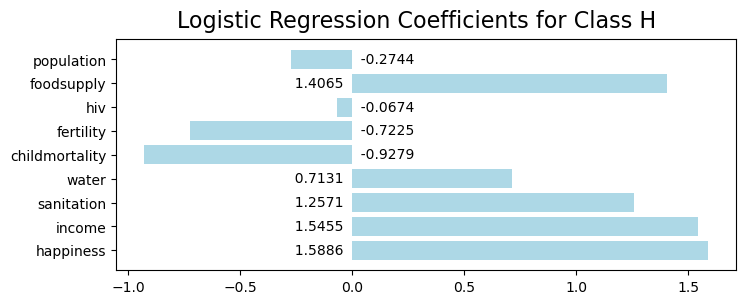

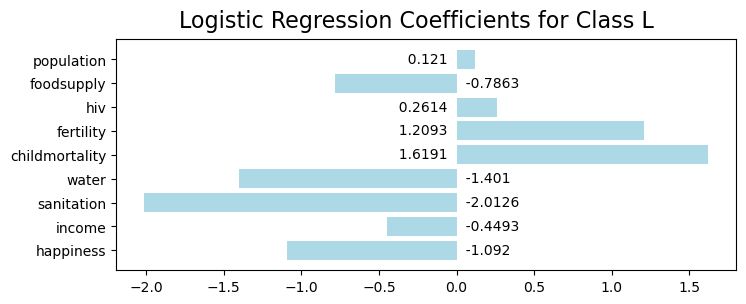

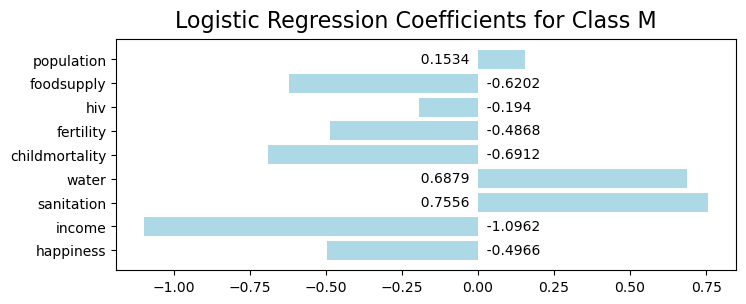

In [47]:
logisticRegressionSummary(model_lr, X.columns)

the logistic regression Coefficients for life expectancy tell us that countries with high sanitation, water and hppiness have more life expectancy then other countries, because the coefficient of water, sanitation and happiness in class H is very high, however they are very low in class L. The decision tree model confirms that too. In addition, the affection of the other features for life expectancy is weak, that's why we can't rely on them.

|*Bilarbi, Achref.(2023) Interpretation * | |
| :---              |          ---: |

Class L,the class of countries with the lowest LE,is highly impacted by the big numbers of fertility & Child mortality and on the major lack of water & sanitation.
In fact raising new born babies & children in some very poor conditions such no sanitations and no potable water mean that they are more vunerable to diseases,microbes,viruses(HIV...)..Example of countries: Afghanistan,Burkina Faso...
And all these can only increase the deathexpectency, especially by children, which will lead us to a lower LE compared with the other Classes.
Speaking of which,Class M, for example has better life conditions compared with L class; we can see high numbers in the water and santitaton numbers on one hand, negative numbers of childmortality on the other hand, which will lead us to a higher LE. Example of countries:Brazil,Belarus...
Now, let's take a look back to the L class again; if we compare its other features to the Class M ones, such as foodsupply and income, they are,believe it or not, better. Even happiness is'nt this far behind.we can then understand that these aren't significant numbers(features) to use to compare between these 2 Classes; but it's the total opposite if we consider the H Class.We can even see more clearly,that these M class numbers, are in effect bad, and that's the Gap between the M & H classes.
In fact, there is similarities when it comes to water, sanitation and childmortality shape and numbers but happiness, foodsupply and income are much, much higher in the countries with high LE.
Example of countries; Luxembourg,Belgium
In the end, water and sanitation are essential for living, that's why in the Class L, LE is low.At the same time we need some other goods like happiness and high income to increase a person's LE more.

|*Dr.Saidi, Omar.(2023) Interpretation * | |
| :---              |          ---: |

## Recap

* You can choose a machine learning algorithms by **building models with multiple algorithms** and seeing which one performs the best.

* Measure the performance of a classification model using an **accuracy score**.

* **Iterate** to improve model performance.

* Inspect the **feature importance** values to understand which features are most significant in a **decision tree** model.

* Inspect the **coefficients** to understand which features are most significant in a **logistic regression** model.